In [217]:
from scipy.integrate import quad
import numpy as np

import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
class L2WeightedApprox:

    def __init__(self, weight):
        self.weight = weight
        self.a = -1
        self.b = 1
    
    def _calc_product(self, f, g) -> float:
        return quad(lambda x: f(x) * g(x) * self.weight(x), self.a, self.b)[0]

    def solve(self, func, phis):
        self._phis = phis
        self._func = func
        coefs = [self._calc_product(func, phi) / self._calc_product(phi, phi) for phi in phis]
        self.coefs = coefs
        return coefs

    def get_vals(self, grid: np.ndarray) -> None:
        vals = np.sum([c * phi(grid) for c, phi in zip(self.coefs, self._phis)], axis=0)
        return vals


In [101]:
GRID = np.linspace(-1, 1, 10000)

In [212]:
def visualize(solver):
    with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
        plt.figure(figsize=(8, 3), dpi=120)
        plt.plot(GRID, solver._func(GRID), color='red', label="Функция")
        plt.plot(GRID, solver.get_vals(GRID), color='blue', label="Приближение", alpha=0.6)
        plt.legend(loc='best')
        plt.title("Сравнение функции и ее аппроксимации")
        plt.show()
    with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
        plt.figure(figsize=(8, 3), dpi=120)
        plt.plot(GRID, np.abs(solver._func(GRID) - solver.get_vals(GRID)), color='red', label=r"Невязка $|f(x) - \phi(x)|$")
        plt.plot(GRID, solver.weight(GRID), color='blue', label=r"Вес $w(x)$", linestyle='dashed', alpha=0.6)
        plt.legend(loc='best')
        plt.title("Невязка и функция веса")
        plt.show()
    

In [199]:
def func(x):
    return (
        #np.exp(x + 1)
        + np.sin(x) * 20
        - 3 * x ** 4
        + np.cos(4 * x)
        - np.log(np.abs(x + 0.6)) * 20
        + 5 * (x - 0.5) ** 10
        + np.exp(-((x - 0.3) / 0.1) ** 2) * 100
        + np.cos(x + 0.2) * 40
        + np.abs(x) * 100
    )

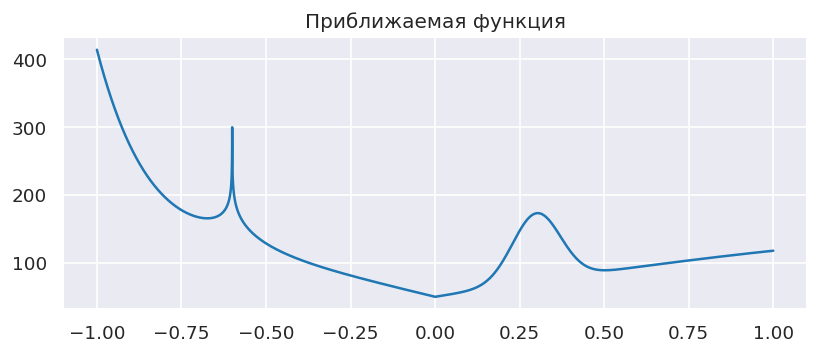

In [200]:
with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
    plt.figure(figsize=(8, 3), dpi=120)
    plt.title("Приближаемая функция")
    plt.plot(GRID, func(GRID))
    plt.show()

### 1. Простой пример

In [259]:
def const(x):
    if isinstance(x, float):
        return 1
    return np.ones(len(x))

def poly(x):
    return 1 + x + 4 * x ** 2 - x ** 3


PHIS = (
    [const]
    + [(lambda x, k=k: np.sin(float(k) * x * np.pi)) for k in range(1, 6)]
    + [(lambda x, k=k: np.cos(float(k) * x * np.pi)) for k in range(1, 6)]
)

UN_WEIGHT = const
NORMAL_WEIGHT = lambda x: np.exp(-(x ** 2)) * 10


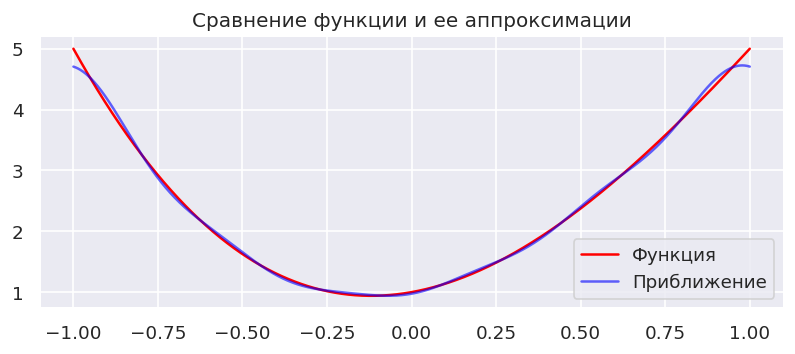

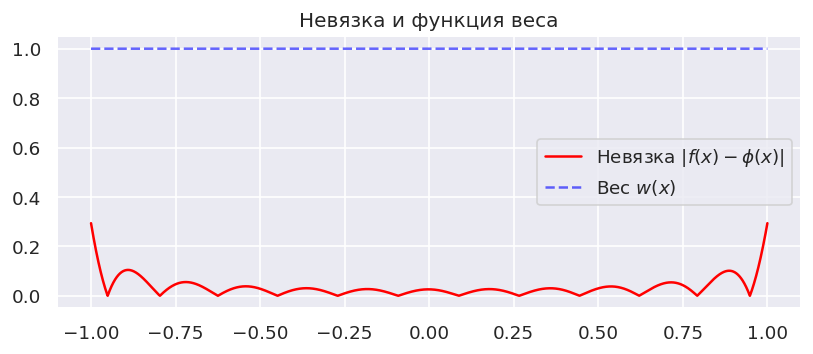

In [244]:
solver = L2WeightedApprox(UN_WEIGHT)
solver.solve(poly, PHIS)
visualize(solver)

### 

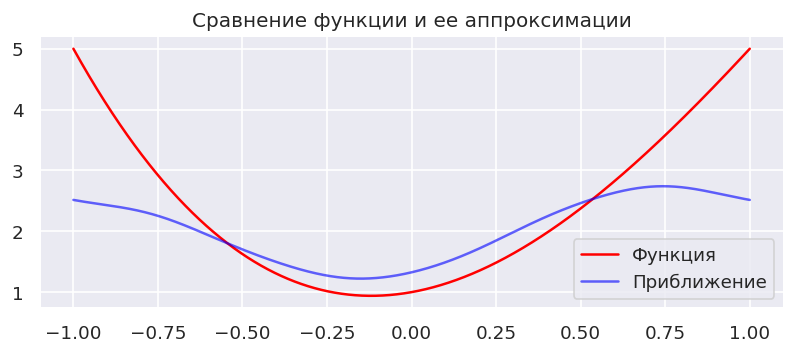

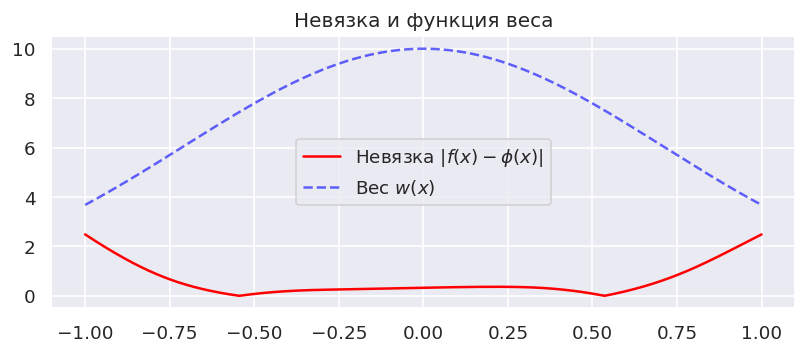

In [260]:
solver = L2WeightedApprox(NORMAL_WEIGHT)
solver.solve(poly, PHIS)
visualize(solver)

### 2. Сложная функция триг. система

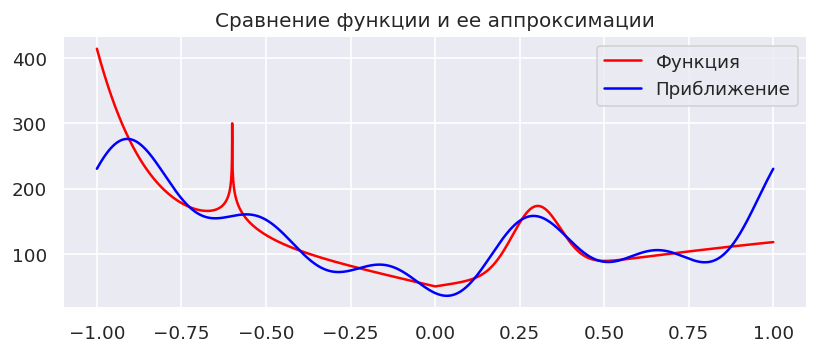

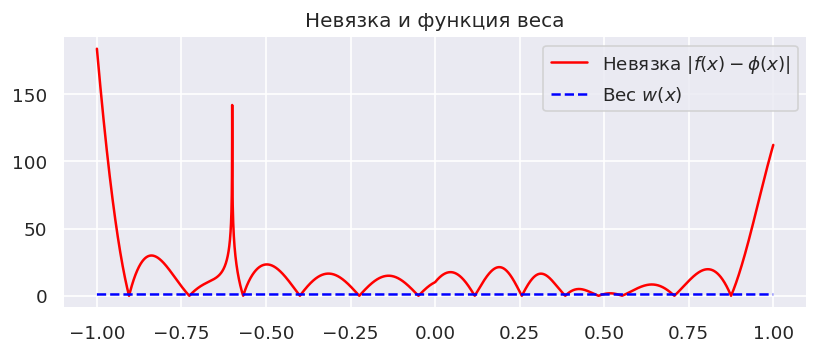

In [209]:
solver = L2WeightedApprox(UN_WEIGHT)
#solver.solve(lambda x: np.sin(x * np.pi), PHIS)
solver.solve(func, PHIS)
visualize(solver)

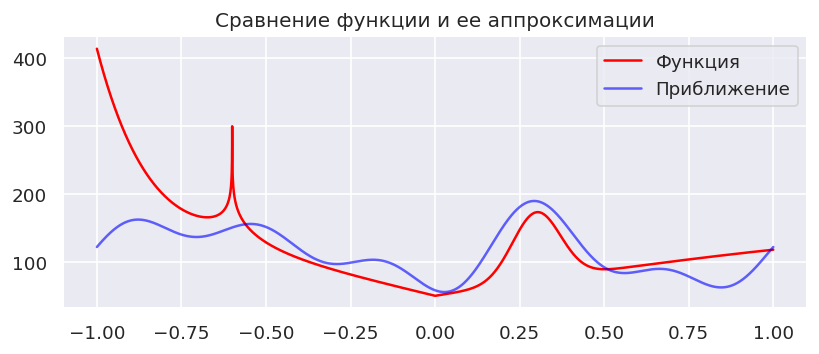

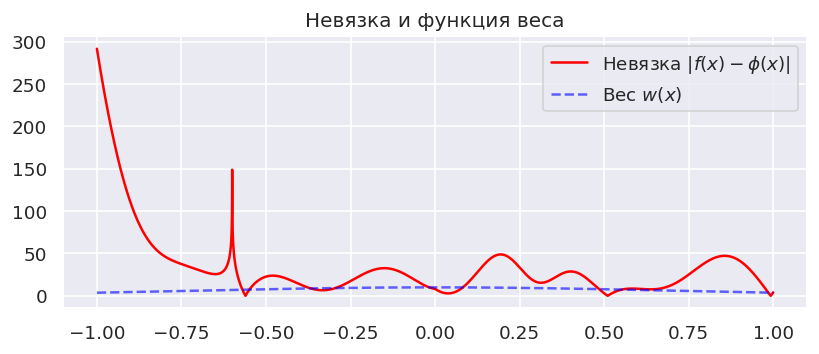

In [261]:
solver = L2WeightedApprox(NORMAL_WEIGHT)
solver.solve(func, PHIS)
visualize(solver)

### 3. Полиномы лежандра

In [246]:
from scipy.special import legendre

In [256]:
LEGENDRE = [legendre(k) for k in range(11)]

SQRT_WEIGHT = lambda x: np.sqrt(1 - x ** 2) * 100

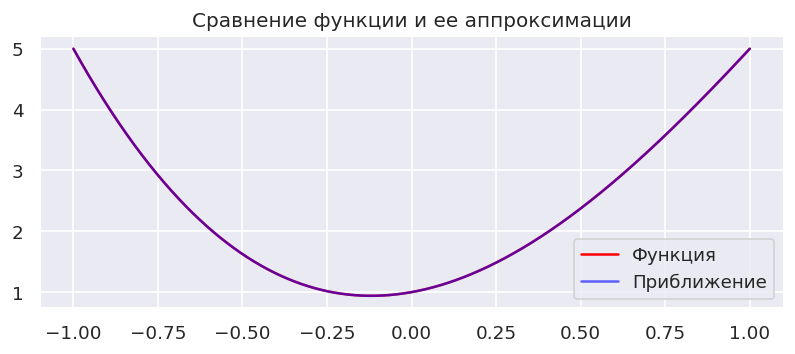

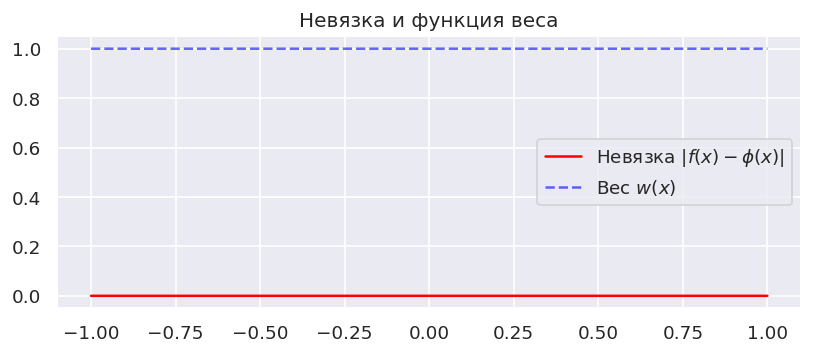

In [252]:
solver = L2WeightedApprox(UN_WEIGHT)
solver.solve(poly, LEGENDRE)
visualize(solver)

### 4. Полиномы Лежандра сложная функция

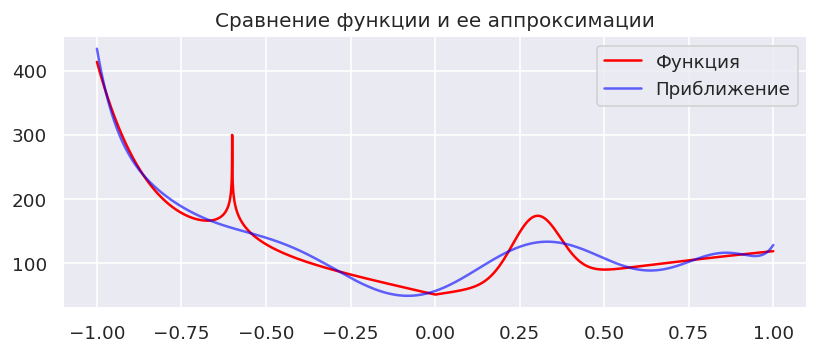

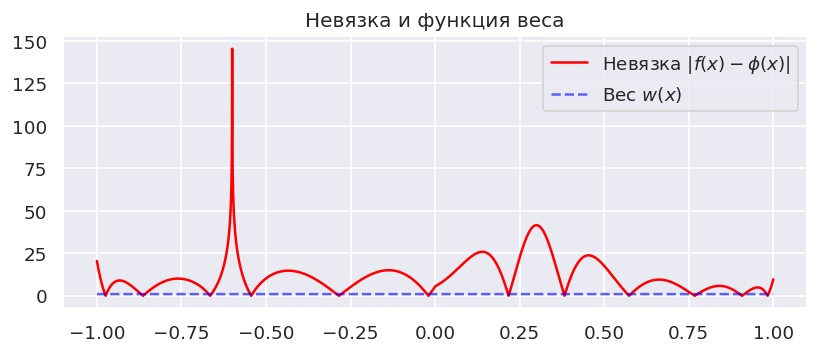

In [253]:
solver = L2WeightedApprox(UN_WEIGHT)
solver.solve(func, LEGENDRE)
visualize(solver)

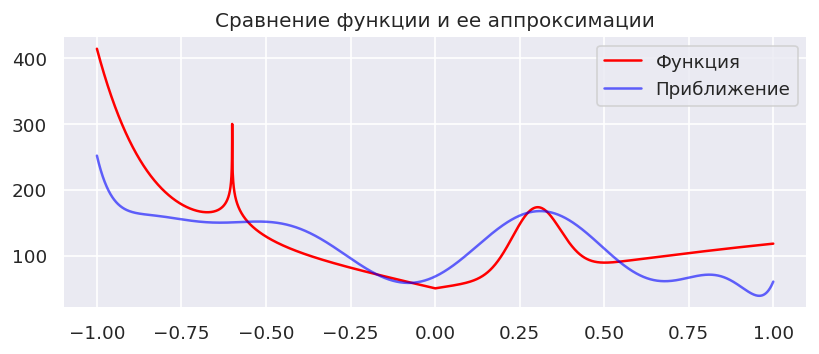

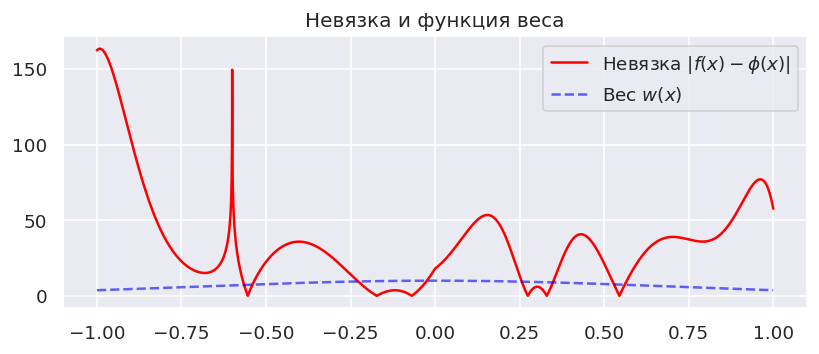

In [262]:
solver = L2WeightedApprox(NORMAL_WEIGHT)
solver.solve(func, LEGENDRE)
visualize(solver)

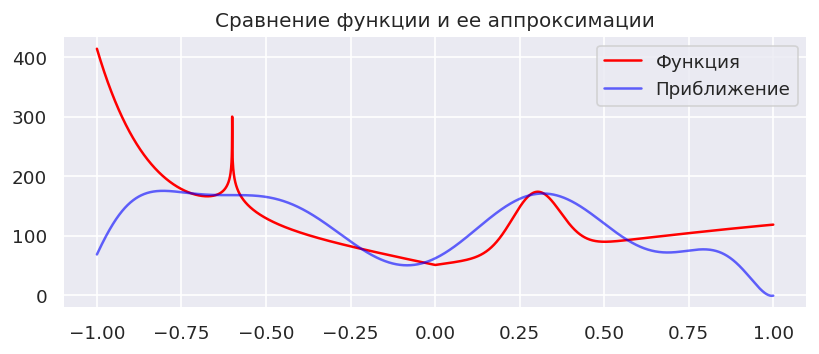

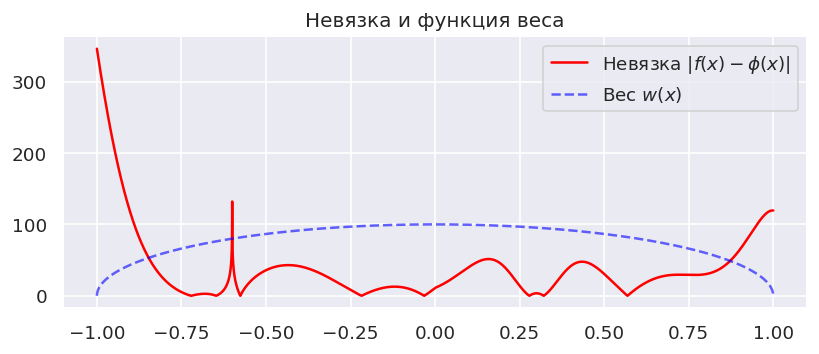

In [257]:
solver = L2WeightedApprox(SQRT_WEIGHT)
solver.solve(func, LEGENDRE)
visualize(solver)